# APIs


## Tasks Today:
1) <b>Requests and the pokemon API </b> <br>
 

# working with APis

<p> What exactly is an API? <br> <br>
API is the acronym for Application Programming Interface, which is a software intermediary that allows two applications to talk to each other. Each time you use an app like Facebook, send an instant message, or check the weather on your phone, you're using an API. </p>

### The Poke API  allows you to retreive a pokemon's information from PokeAPI https://pokeapi.co/



In [27]:
# making an API call
import requests

api_endpoint = 'https://pokeapi.co/api/v2/pokemon/'

# requests.get(api_endpoint+'pikachu').json()

pokemon = input('What pokemon are you looking for?\n').lower()

response = requests.get(f'{api_endpoint}{pokemon}')

#access status code (ie 200 good, 404 bad)
response.status_code

if response.status_code == 200:
    my_pokemon = response.json()
    print('Success')
else:
    print(f'Error, status code {response.status_code}')

What pokemon are you looking for?
charmander
Success


### Display a Pokemon's name, weight, abilities, and types

In [32]:
# get the name
my_pokemon['forms'][0]['name']

'charmander'

In [40]:
# get types
my_pokemon['types']

[{'slot': 1,
  'type': {'name': 'fire', 'url': 'https://pokeapi.co/api/v2/type/10/'}}]

In [30]:
# get weight
my_pokemon['weight']

85

In [65]:
# get abilities
print(my_pokemon['abilities'])
abilities = my_pokemon['abilities']

[{'ability': {'name': 'blaze', 'url': 'https://pokeapi.co/api/v2/ability/66/'}, 'is_hidden': False, 'slot': 1}, {'ability': {'name': 'solar-power', 'url': 'https://pokeapi.co/api/v2/ability/94/'}, 'is_hidden': True, 'slot': 3}]


In [62]:
[ability_dict['ability']['name'] for ability_dict in abilities]

['blaze', 'solar-power']

In [6]:
# Create a structure for a single pokemon


In [51]:
pokemon_dict = {
    'Name' : my_pokemon['forms'][0]['name'],
    'Type' : my_pokemon['types'],
    'Weight' : my_pokemon['weight'],
    'Abilities' : [ability_dict['ability']['name'] for ability_dict in abilities]
}

print(pokemon_dict)

{'Name': 'charmander', 'Type': [{'slot': 1, 'type': {'name': 'fire', 'url': 'https://pokeapi.co/api/v2/type/10/'}}], 'Weight': 85, 'Abilities': ['blaze', 'solar-power']}


#### Create a function to Pull in your own Pokemon's data 

In [85]:
def poke_api_call(pokemon):
    pokemon_dict = {}
    response = requests.get(f'https://pokeapi.co/api/v2/pokemon/{pokemon}')
    if response.status_code == 200:
        print('Successfully chose your pokemon')
        my_pokemon = response.json()
        abilities = my_pokemon['abilities']
        pokemon_dict = {
                'Name' : my_pokemon['forms'][0]['name'],
                'Type' : my_pokemon['types'],
                'Weight' : my_pokemon['weight'],
                'Abilities' : [ability_dict['ability']['name'] for ability_dict in abilities]
            }
    else:
        print(f'Error, something wrong with your search: {response.status_code}')
    return pokemon_dict

poke_api_call(input('Which pokemon would you like to chose?'))

Which pokemon would you like to chose?2
Successfully chose your pokemon


{'Name': 'ivysaur',
 'Type': [{'slot': 1,
   'type': {'name': 'grass', 'url': 'https://pokeapi.co/api/v2/type/12/'}},
  {'slot': 2,
   'type': {'name': 'poison', 'url': 'https://pokeapi.co/api/v2/type/4/'}}],
 'Weight': 130,
 'Abilities': ['overgrow', 'chlorophyll']}

Choose your pokemon

In [99]:
from random import randint
# Random number generated for each pokemon id
random_team = [randint(1,898) for i in range(6)]
print(random_team)
your_team = ['electabuzz', 'haunter','tyranitar','blaziken','marowak','dragonair']


[507, 12, 16, 449, 569, 752]


In [101]:
your_team_dict = {pokemon: poke_api_call(pokemon) for pokemon in your_team}

print(your_team_dict)

Successfully chose your pokemon
Successfully chose your pokemon
Successfully chose your pokemon
Successfully chose your pokemon
Successfully chose your pokemon
Successfully chose your pokemon
{'electabuzz': {'Name': 'electabuzz', 'Type': [{'slot': 1, 'type': {'name': 'electric', 'url': 'https://pokeapi.co/api/v2/type/13/'}}], 'Weight': 300, 'Abilities': ['static', 'vital-spirit']}, 'haunter': {'Name': 'haunter', 'Type': [{'slot': 1, 'type': {'name': 'ghost', 'url': 'https://pokeapi.co/api/v2/type/8/'}}, {'slot': 2, 'type': {'name': 'poison', 'url': 'https://pokeapi.co/api/v2/type/4/'}}], 'Weight': 1, 'Abilities': ['levitate']}, 'tyranitar': {'Name': 'tyranitar', 'Type': [{'slot': 1, 'type': {'name': 'rock', 'url': 'https://pokeapi.co/api/v2/type/6/'}}, {'slot': 2, 'type': {'name': 'dark', 'url': 'https://pokeapi.co/api/v2/type/17/'}}], 'Weight': 2020, 'Abilities': ['sand-stream', 'unnerve']}, 'blaziken': {'Name': 'blaziken', 'Type': [{'slot': 1, 'type': {'name': 'fire', 'url': 'https:/

#### Use your function to create a dictionary of your Johto League 6  (favorite 6 pokemon)

In [97]:
# Place all 6 of your pokemon on the object below, each pokemon should have at least as much info as Pikachu did.
my_six_pokemon = {}

for i in random_team:
    poke_dict = poke_api_call(i)
    my_six_pokemon[poke_dict['Name']] = poke_dict

for k in my_six_pokemon:
    print(k, ' ', my_six_pokemon[k])

Successfully chose your pokemon
Successfully chose your pokemon
Successfully chose your pokemon
Successfully chose your pokemon
Successfully chose your pokemon
Successfully chose your pokemon
lickitung   {'Name': 'lickitung', 'Type': [{'slot': 1, 'type': {'name': 'normal', 'url': 'https://pokeapi.co/api/v2/type/1/'}}], 'Weight': 655, 'Abilities': ['own-tempo', 'oblivious', 'cloud-nine']}
honedge   {'Name': 'honedge', 'Type': [{'slot': 1, 'type': {'name': 'steel', 'url': 'https://pokeapi.co/api/v2/type/9/'}}, {'slot': 2, 'type': {'name': 'ghost', 'url': 'https://pokeapi.co/api/v2/type/8/'}}], 'Weight': 20, 'Abilities': ['no-guard']}
forretress   {'Name': 'forretress', 'Type': [{'slot': 1, 'type': {'name': 'bug', 'url': 'https://pokeapi.co/api/v2/type/7/'}}, {'slot': 2, 'type': {'name': 'steel', 'url': 'https://pokeapi.co/api/v2/type/9/'}}], 'Weight': 1258, 'Abilities': ['sturdy', 'overcoat']}
houndoom   {'Name': 'houndoom', 'Type': [{'slot': 1, 'type': {'name': 'dark', 'url': 'https://p

## Lets create a class called 'Pokemon' and create our pokemon as instances

In [120]:
pokemon_dict = {
    'name' : my_pokemon['forms'][0]['name'],
    'types' : my_pokemon['types'],
    'weight' : my_pokemon['weight'],
    'abilities' : [ability_dict['ability']['name'] for ability_dict in abilities]
}

In [140]:
class Pokemon():
    
    def __init__(self, name, nickname):
        self.name = name
        self.nickname = nickname
        self.abilities = []
        self.types = []
        self.weight = None
        self.image = None
        self.call_poke_api()
        
    def call_poke_api(self):
        response = requests.get(f'https://pokeapi.co/api/v2/pokemon/{self.name}')
        if response.status_code == 200:
            print('Success')
            my_pokemon = response.json()
            self.name = my_pokemon['name']
            self.abilities = [ability_dict['ability']['name'] for ability_dict in my_pokemon['abilities']]               
            self.types =  my_pokemon['types']
            self.weight = my_pokemon['weight']
            self.image = my_pokemon['sprites']['versions']['generation-v']['black-white']['animated']['front_default']
            if not self.image:
                self.image = my_pokemon['sprites']['front_default']
        else:
            print(f'Error status code {respnse.status_code}')
        

In [136]:
new_poke = Pokemon('pikachu', 'zappy rodent')
new_poke.call_poke_api()
print(new_poke.weight)
print(new_poke.abilities)
print(new_poke.name)


Success
Success
60
['static', 'lightning-rod']
pikachu


In [144]:
another_poke = Pokemon('222', 'vine turtle')
print(another_poke.name)
print(another_poke.image)

Success
corsola
https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/versions/generation-v/black-white/animated/222.gif


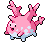

In [145]:
from IPython.display import Image

display(Image(another_poke.image))

### Let's Catch some Pokemon

In [147]:
dylans_pokemon = ['snorlax','celebi','zapdos','hitmonlee']

In [149]:
pokedex = {}
for pokemon in dylans_pokemon:
    pokedex[pokemon] = Pokemon(pokemon, 'generic name')
print(pokedex)

Success
Success
Success
Success
{'snorlax': <__main__.Pokemon object at 0x7fc855f4ee20>, 'celebi': <__main__.Pokemon object at 0x7fc85534c790>, 'zapdos': <__main__.Pokemon object at 0x7fc85537df70>, 'hitmonlee': <__main__.Pokemon object at 0x7fc85536f250>}


In [153]:
pokedex = {pokemon:Pokemon(pokemon, 'nickname') for pokemon in dylans_pokemon}


Success
Success
Success
Success


In [162]:
class Pokedex():
    def __init__(self, username):
        self.username = username
        self.pokemon = {}
        
    def add_pokemon(self, pokemon):
        self.pokemon[pokemon] = Pokemon(pokemon, 'monster')
        
new_pokedex = Pokedex('ben')

new_pokedex.add_pokemon('squirtle')

new_pokedex.username

Success


'ben'

In [163]:
def print_user_pokemon(pokedex):
    print(f'{pokedex.username}\'s pokemon:')
    poke_dict = pokedex.pokemon
    for poke in poke_dict:
        print(poke_dict[poke].name)
        
print_user_pokemon(new_pokedex)

ben's pokemon:
squirtle


## Exercise 1:

### Create a Method that prints an image of your pokemon

<p>HINT: You may need another attribute as well to store your image url within. </p>

In [5]:
# Display an image in Jupyter notebook
from IPython.display import Image
import requests

# display(Image( 'https://i.redd.it/45n4mhusa8l41.jpg', width = 300))
class Pokemon():
    
    def __init__(self, name, nickname):
        self.name = name
        self.nickname = nickname
        self.abilities = []
        self.types = []
        self.weight = None
        self.image = None
        self.call_poke_api()
        
    def call_poke_api(self):
        response = requests.get(f'https://pokeapi.co/api/v2/pokemon/{self.name}')
        if response.status_code == 200:
            print('Success')
            my_pokemon = response.json()
            self.name = my_pokemon['name']
            self.abilities = [ability_dict['ability']['name'] for ability_dict in my_pokemon['abilities']]               
            self.types =  my_pokemon['types']
            self.weight = my_pokemon['weight']
            self.image = my_pokemon['sprites']['front_default']
            
    def poke_portrait(self):
        display(Image(self.image, width = 300))  

Success
[{'slot': 1, 'type': {'name': 'fire', 'url': 'https://pokeapi.co/api/v2/type/10/'}}, {'slot': 2, 'type': {'name': 'flying', 'url': 'https://pokeapi.co/api/v2/type/3/'}}]


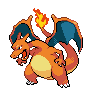

In [6]:
bens_pokemon = Pokemon('charizard', 'Big Dragon')
# bens_pokemon.call_poke_api()
print(bens_pokemon.types)
bens_pokemon.poke_portrait()

## Exercise 2:

### Create a Method that evolves your Pokemon
If your pokemon can't evolve any further print a message that says "\<name of pokemon> can't evolve."

In [321]:
# pokemon -> species(key)  -> url(key) -> evolution chain

# Display an image in Jupyter notebook
from IPython.display import Image
import requests

# display(Image( 'https://i.redd.it/45n4mhusa8l41.jpg', width = 300))
class Pokemon():
    
    def __init__(self, name, nickname):
        self.name = name
        self.nickname = nickname
        self.abilities = []
        self.types = []
        self.weight = None
        self.image = None
        self.call_poke_api()
        
    def call_poke_api(self):
        response = requests.get(f'https://pokeapi.co/api/v2/pokemon/{self.name}')
        if response.status_code == 200:
            print('Success')
            my_pokemon = response.json()
            self.name = my_pokemon['name']
            self.abilities = [ability_dict['ability']['name'] for ability_dict in my_pokemon['abilities']]               
            self.types =  my_pokemon['types']
            self.weight = my_pokemon['weight']
            self.image = my_pokemon['sprites']['front_default']
            
    def poke_portrait(self):
        display(Image(self.image, width = 300))
        
    def poke_evolve (self):
        resonse = requests.get(f'https://pokeapi.co/api/v2/pokemon/{self.name}')
        my_pokemon = response.json()
        if response.status_code == 200:
            print(f'Okay, let\'s evolve {self.name}')
            self.evolve = my_pokemon['species']['url']['evolution']['url']
            
        

Now let's evolve a few

#  Final Exercise: <br> <br>Create a Move_Tutor Class that will allow the Pokemon Class to inherit a move list.
<br>
<p>for an added bonus you can make sure that if a pokemon has 4 moves the user can choose one of them to replace with a new move. </p>

In [20]:
from IPython.display import Image
import requests

class Move_Tutor():
    def __init__(self, move_list = []):
        self.move_list = move_list
        
    def learn_new_move(self):
        print(f'Moves that {self.name} knows:')
        print(self.move_list)
        new_move = input('Enter a move to learn: ')
        if new_move in self.move_list:
            self.already_knows_move(new_move)
        elif len(self.move_list) == 4:
            self.make_room_move(new_move)
        else:
            self.move_list.append(new_move)
        
    def already_knows_move(self, new_move):
        print(f'The move {new_move} has already been learned')
        print(self.move_list)
        user_choice = input('Would you like to try to learn a different move? y or n?').lower()
        if user_choice == 'y':
            self.learn_new_move()
        else:
            return('Done learning moves')
    
    def make_room_move(self, new_move):
        print(f'There are already 4 moves in {self.name} move list.')
        print(self.move_list)
        user_choice = input('Would you like to try to learn a different move? y or n?').lower()
        if user_choice == 'n':
            return('Done learning moves')
        else:
            user_choice = input('Which move would you like to forget?')
            if user_choice in self.move_list:
                self.move_list.remove(user_choice)
                self.move_list.append(new_move)
                print(f'Your pokemon {self.name} forgot {user_choice} and learned {new_move}!')
            else:
                print('That move is not in the known list, check for typing errors')
                self.make_room_move(new_move)
                
class Pokemon(Move_Tutor):
    
    def __init__(self, name, move_list):
        super().__init__(move_list)
        self.name = name
        self.abilities = []
        self.types = []
        self.weight = None
        self.image = None
        self.call_poke_api()
        
    def call_poke_api(self):
        response = requests.get(f'https://pokeapi.co/api/v2/pokemon/{self.name}')
        if response.status_code == 200:
            print('Success')
            my_pokemon = response.json()
            self.name = my_pokemon['name']
            self.abilities = [ability_dict['ability']['name'] for ability_dict in my_pokemon['abilities']]               
            self.types =  my_pokemon['types']
            self.weight = my_pokemon['weight']
            self.image = my_pokemon['sprites']['front_default']
            
    def poke_portrait(self):
        display(Image(self.image, width = 300))    
        
        
        
        

In [ ]:
bens_pokemon = Pokemon('machamp',['close combat', 'cross chop', 'rock slide', 'agility'])
bens_pokemon.learn_new_move()
bens_pokemon.learn_new_move()

Success
Moves that machamp knows:
['close combat', 'cross chop', 'rock slide', 'agility']
